# Finanzdaten Projekt

In diesem Datenprojekt werden wir uns auf die Analyse von Aktienpreise konzentrieren. Denkt dabei daran, dass es hier primär um die Visualisierungs- und Analysefähigkeiten geht, nicht daraum verlässliche Finanzanalysen durchzuführen.

**Achtung**: Dieses Projekt wird eine große Herausforderung weil es eine Menge neuer Konzepte einführt, die ihr selbst recherchieren müsst. Nichtsdestotrotz werden wir die notwendigen Hinweise geben. Dabei sei es jedem freigestellt parallel ins Lösungsnotebook oder das Video-Material zu schauen und dieses Projekt als "Walkthrough" zu lösen.

Wir werden uns nun also Bankaktien anschauen und wie sie sich seit der Finanzkrise bis Anfang 2016 entwickelt haben.

## Die Daten

In dieser Sektion werden wir lernen, wie wir mit Pandas direkt Daten aus Google Fiance lesen können.

Zuerst müssen wir demnach einige Imports machen, welche im Rahmen dieses Projektes gegeben sind.

*Hinweis: Zum korrekten Auslesen der Finanzdaten müssen wir noch den [pandas-datareader](https://github.com/pydata/pandas-datareader) installieren:*

    conda install pandas-datareader

### Die Importe

*Bereits ausgefüllt:*

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

Falls Die daten nicht richtig seit 2006 geladen werden gibt es einen Vorläufigen fix für den Pandas Data Reader:

In [2]:
from pandas_datareader.google.daily import GoogleDailyReader

@property
def url(self):
    return 'http://finance.google.com/finance/historical'

GoogleDailyReader.url = url

### Daten

Wir können die Daten durch verwendung des *Pandas Datareader* erhalten. Dieser liefert uns Aktieninformationen zu den folgenden Banken:

* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

**Finde nun heraus, wie du die Aktiendaten vom 1. Januar 2006 bis zum 1. Januar 2017 für jede dieser Banken erhälst. Erstelle dazu für jede Bank einen eigenen DataFrame. Die Namen dieser DataFrames sollen dem Ticker Symbol (z.B.: BAC für Bank of America) entsprechen. Das alles benötigt einige Schritte:**

1. Nutze `datetime`, um Start und Ende Objekte zu erstellen.
2. Finde das Ticker Symbol für jede Bank heraus.
3. Finde heraus, wie du den datareader nutzen kannst, um die Informationen zu erhalten.

**Nutze diese [Dokumentationsseite](http://pandas.pydata.org/pandas-docs/stable/ecosystem.html) für Hinweise und Tipps. Es sollte dabei nur um das richtige Ersetzen bestimmter Daten gehen. Nutze "Google Finance" als Quelle. Zum Beispiel:**

    # Bank of America
    BAC = data.DataReader("BAC","google",start,end)

In [3]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2017, 1, 1)

In [4]:
# Bank of America
BAC = data.DataReader("BAC", 'google', start, end)

# CitiGroup
C = data.DataReader("C", 'google', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'google', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'google', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'google', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'google', start, end)

In [5]:
# Alternative: Nutzung eines Panel-Objekts
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'google', start, end)

**Erstelle eine Liste der Ticker Symbole (als String) in alphabetischer Reihenfolge. Nenne diese Liste "tickers".**

In [6]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

**Nutze `pd.concat`, um die einzelnen DataFrames zu einem Banken-DataFrame namens "bank_stocks" zusammenzufassen. Setze dabei das Keys (dt. Schlüssel) Argument gleich der tickers-Liste.**

*Hinweis: Achte auf die Achse auf die du `concat` anwendest.*

In [7]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

**Definiere die Spalten namen (bereits vorausgefüllt).**

In [8]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

**Schaue dir den head des bank_stocks DataFrame an.**

In [9]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

## Explorative Datenanalyse

Lasst uns die Daten etwas untersuchen! Doch bevor wir damit loslegen ermutige ich euch, das [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) und die [Nutzung von .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) genauer anzuschauen.

**Was ist der maximale Kurs zum Handelsschluss (en. close price) für jede der Banken in unserer gesamten Zeitperiode?**

In [10]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     87.13
MS      89.30
WFC     58.52
dtype: float64

**Erstelle einen neuen leeren DataFrame namens "returns" (dt. Rendite). Dieser DataFrame wird die Renditen für die Aktien der Banken beinhalten. Renditen sind typischerweise wie folgt definiert:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [11]:
returns = pd.DataFrame()

**Wir können nun Pandas `pct_change()` Methode auf den Schlusskurs anwenden, um eine Spalte zu erzeugen, die die Renditen beinhaltet. Erstelle dazu eine `for` Schleife, die für jeden Bank Aktienticker diese Renditenspalte erzeugt und sie in unseren returns DataFrame schreibt.**

In [12]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
Date                                                                          
2006-01-03         NaN       NaN        NaN         NaN        NaN         NaN
2006-01-04   -0.010620 -0.018462  -0.013812   -0.014183   0.000686   -0.011599
2006-01-05    0.001288  0.004961  -0.000393    0.003029   0.002742   -0.000951
2006-01-06   -0.001501  0.000000   0.014169    0.007046   0.001025    0.005714
2006-01-09    0.000644 -0.004731   0.012030    0.016242   0.010586    0.000000

**Erstelle jetzt ein `pairplot` mit Seaborn vom returns DataFrame. Welche Aktien stechen heraus? Woran könnte das liegen?**

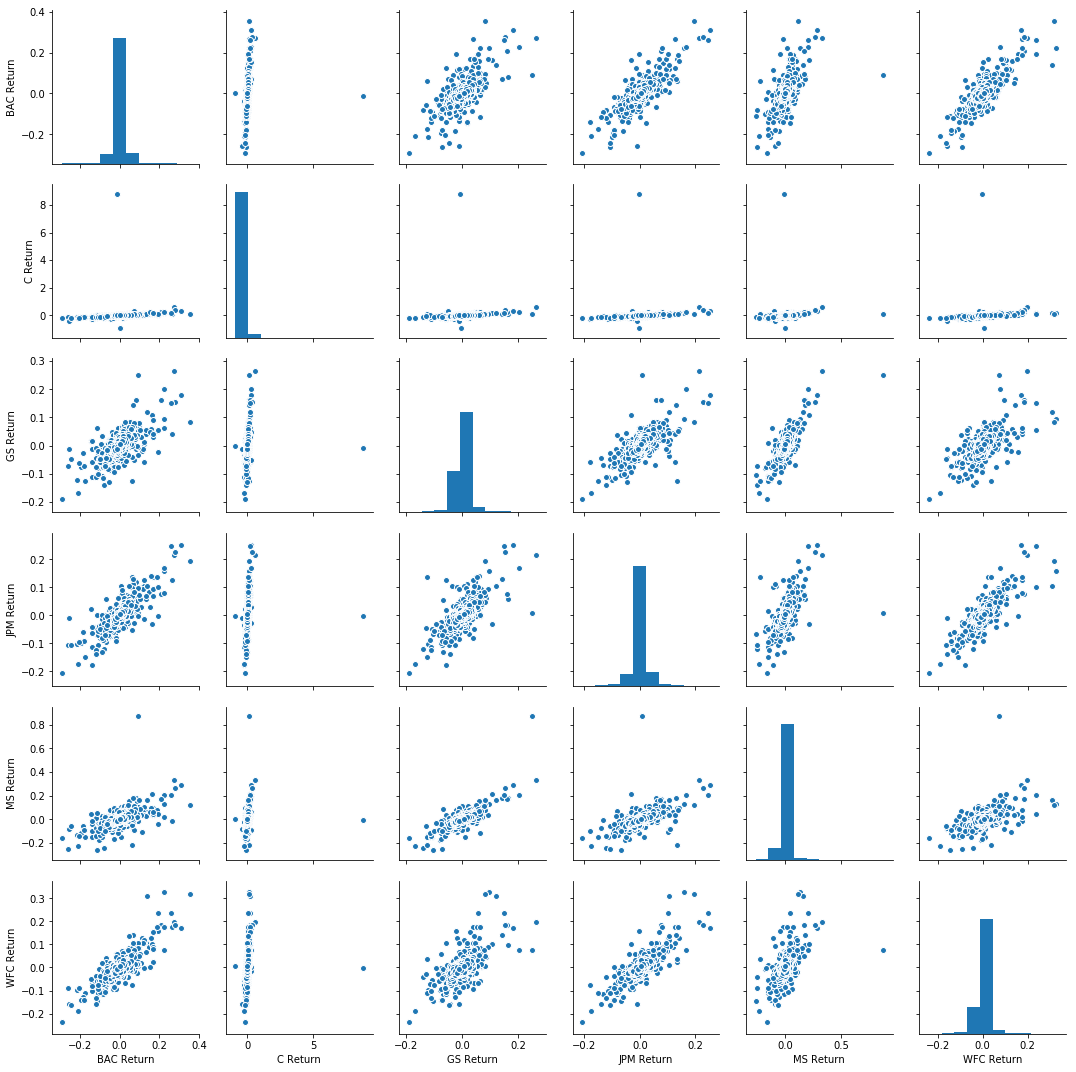

In [13]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:])

Hintergrundinformationen zum Crash der Citigroup Aktie gibts [hier](https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29).

Man sieht außerdem einen enormen Crash im Wert der Aktien (was wir bei den Visualisierungen später noch tun werden).

**Unter Verwendung des return DataFrame: finde heraus an welchem Tag die jeweiligen Banken die besten und schlechtesten Eintagesrenditen hatten. Dabei sollte dir auffallen, dass 4 der Banken ihren schlechtesten am selben Tag hatte. Was passierte an diesem Tag?**

In [14]:
returns.idxmin() # Inauguration Day in den USA

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [15]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

**Dabei sollte aufgefallen sein, dass der größte Einbruch und Gewinn der Citigroup nahe zusammen liegen. Ist etwas signifikantes passiert?**

[Citigroup had a stock split.](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=citigroup+stock+2011+may)

**Betrachte jetzt die Standardabweichung der Renditen. Welche Aktie würdest du demnach als die riskanteste über den gesamten Zeitraum hinweg bezeichnen? Welche würdest du als riskanteste im Jahr 2016 bezeichnen?**

In [16]:
returns.std()

BAC Return    0.035470
C Return      0.171685
GS Return     0.024695
JPM Return    0.026784
MS Return     0.036584
WFC Return    0.029179
dtype: float64

In [17]:
returns.ix['2016-01-01':'2016-12-31'].std()

BAC Return    0.020231
C Return      0.020036
GS Return     0.016893
JPM Return    0.015624
MS Return     0.020527
WFC Return    0.015081
dtype: float64

**Erstelle ein `distplot` mit Seaborn für die Renditen von Morgan Stranley in 2016.**

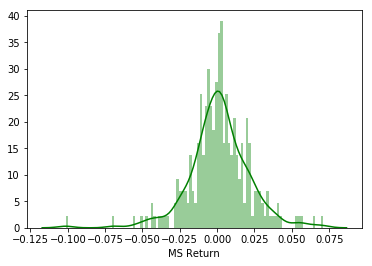

In [18]:
sns.distplot(returns.ix['2016-01-01':'2016-12-31']['MS Return'],color='green',bins=100)

**Erstelle ein `distplot` mit Seaborn für die Renditen der CitiGroup in 2008.**

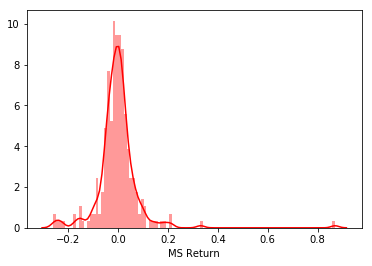

In [19]:
sns.distplot(returns.ix['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)

## Mehr Visualisierungen

Der folgende Teil dieses Projekts dreht sich komplett um Visualisierungen.  Nutze dabei eine Library deiner Wahl, oder mehrere. Ziel ist es, die abgebildeten Visualisierungen nachzustellen. Wähle zwischen Seaborn, Matplotlib, Plotly, Cufflinks oder einfach Pandas.

### Importe

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

**Erstelle ein Liniendiagramm, das die Tagesschlusspreise für jede Bank für die gesamte Zeitperiode zeigt.**

*Hinweis: Eine `for` Schleife oder .xs können funktionieren.*

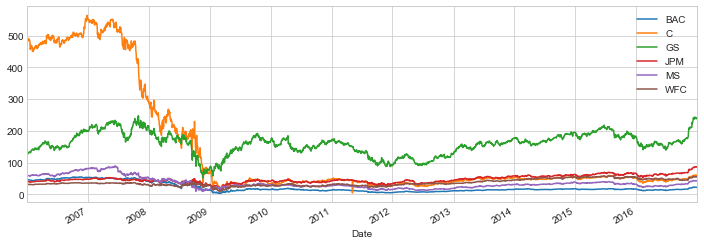

In [21]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

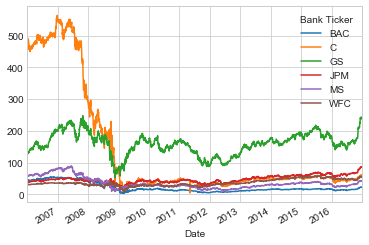

In [22]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [23]:
# Plotly
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

### Laufender Durchschnitt

Lasst uns den laufenden Durchschnitt für diese Aktien im Jahr 2008 berechnen.

**Zeichne den laufenden 30-Tages-Durchschnitt gegen den Tagesschlusspreis für die Bank of America im Jahr 2008.**

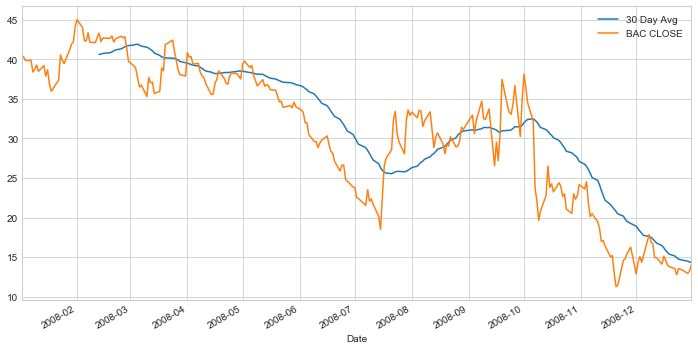

In [24]:
plt.figure(figsize=(12,6))
BAC['Close'].ix['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].ix['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

**Erstelle eine `heatmap` der Korrelation zwischen den Schlusspreisen der Banken.**

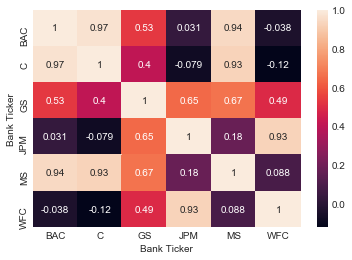

In [25]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

**Optional: Nutze die `clustermap` aus Seaborn, um die Korrelationen zu clustern.**

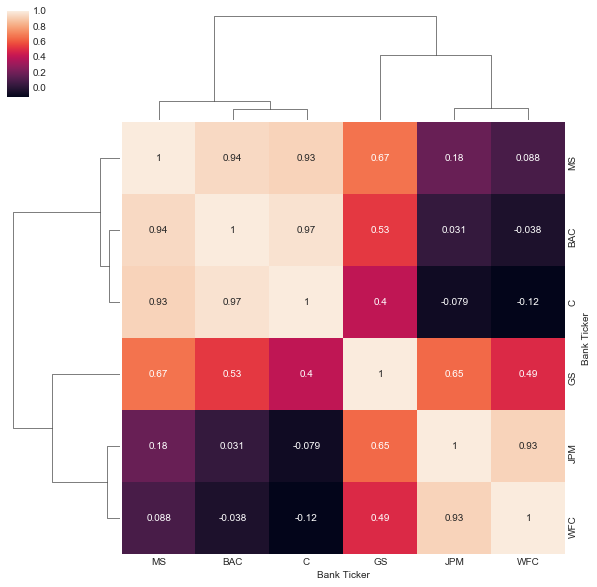

In [26]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [27]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# Gut gemacht!